In [ ]:
from google.colab import userdata
api_key = userdata.get('weather')

In [ ]:
import requests
import pandas as pd

cities = [
    'New York', 'Los Angeles', 'London', 'Paris', 'Tokyo', 'Sydney', 'Cairo',
    'Moscow', 'Rio de Janeiro', 'Mexico City', 'Mumbai', 'Beijing', 'Cape Town',
    'Toronto', 'Berlin', 'Singapore', 'Dubai', 'Seoul', 'Rome', 'Buenos Aires',
    'Chicago', 'Houston', 'Miami', 'San Francisco', 'Vancouver', 'Montreal', 'Mexico City',
    'Lima', 'Santiago', 'Bogota', 'Quito', 'Caracas', 'Madrid', 'Athens', 'Warsaw',
    'Amsterdam', 'Stockholm', 'Lisbon', 'Dublin','Bangkok', 'Kuala Lumpur', 'Jakarta',
    'Delhi', 'Shanghai', 'Istanbul', 'Tehran', 'Riyadh','Lagos', 'Nairobi', 'Casablanca',
    'Accra', 'Addis Ababa', 'Melbourne', 'Auckland', 'Brisbane', 'Perth'
]


records = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        records.append({
            'city': city,
            'temp': data['main']['temp'],
            'feels_like': data['main']['feels_like'],
            'humidity': data['main']['humidity'],
            'pressure': data['main']['pressure'],
            'wind_speed': data['wind']['speed'],
            'cloudiness': data['clouds']['all'],
            'lat': data['coord']['lat'],
            'lon': data['coord']['lon'],
        })
    else:
        print(f"⚠️ Could not fetch data for {city}")

df = pd.DataFrame(records)
df.head()


,city,temp,feels_like,humidity,pressure,wind_speed,cloudiness,lat,lon
0,New York,16.38,15.48,54,1002,7.60,20,40.7143,-74.0060
1,Los Angeles,16.48,16.12,74,1021,5.66,0,34.0522,-118.2437
2,London,15.04,14.66,79,1006,2.06,100,51.5085,-0.1257
3,Paris,12.52,12.02,84,1008,2.06,0,48.8534,2.3488
4,Tokyo,17.02,16.42,63,1018,7.20,75,35.6895,139.6917


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['temp', 'feels_like', 'humidity', 'pressure', 'wind_speed', 'cloudiness']
X_scaled = StandardScaler().fit_transform(df[features])


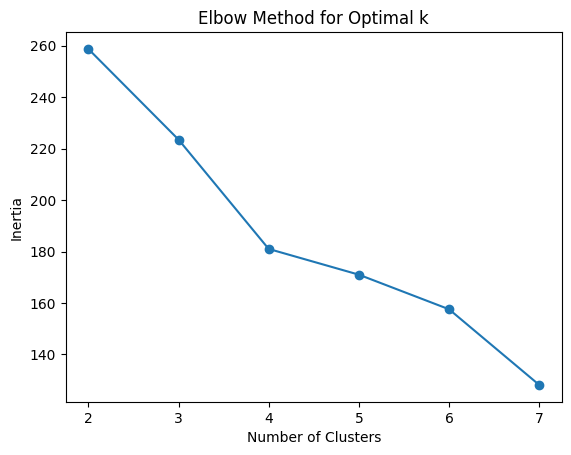

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 8), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Fit KMeans with the chosen number of clusters (e.g., 4 based on the elbow plot)
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = km.labels_

# Group by cluster and calculate the mean of the features
df.groupby('cluster')[features].mean().round(2)

,temp,feels_like,humidity,pressure,wind_speed,cloudiness
cluster,,,,,,
0,11.59,10.64,67.83,1017.58,1.80,7.67
1,16.98,16.00,64.69,1016.69,6.66,25.94
2,25.95,27.64,72.93,1012.71,3.01,50.71
3,12.51,11.77,84.71,1016.86,3.27,91.07


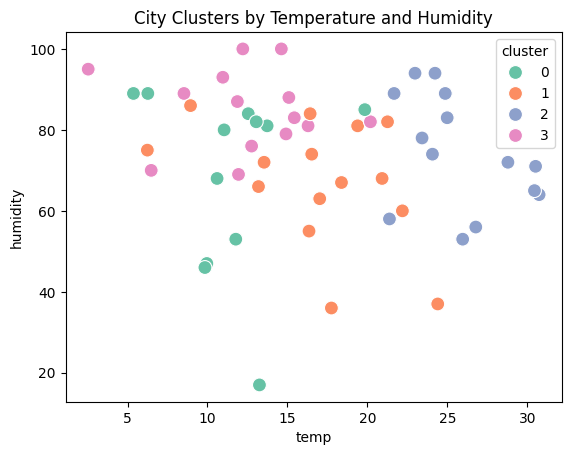

In [ ]:
import seaborn as sns

sns.scatterplot(
    x='temp', y='humidity',
    hue='cluster',
    data=df,
    palette='Set2',
    s=100
)
plt.title("City Clusters by Temperature and Humidity")
plt.show()

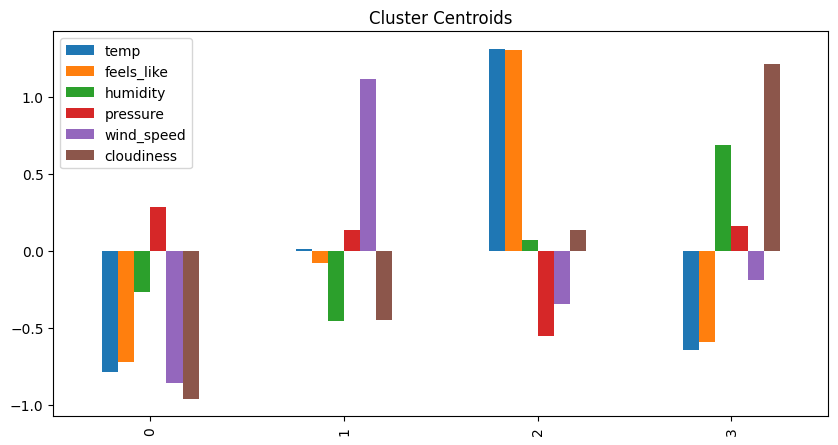

In [ ]:
import pandas as pd

centroids = pd.DataFrame(km.cluster_centers_, columns=features)
centroids.plot(kind='bar', figsize=(10,5))
plt.title('Cluster Centroids')
plt.show()